# Regresión Polinómica con scikit-learn
La implementación de la regresión polinomial con scikit-learn es muy similar a la regresión lineal. Solo hay un paso adicional: debe transformar la matriz de entradas para incluir términos no lineales como 𝑥².
### 1. Importar paquetes y clases
Además de **numpy** y **sklearn.linear_model.LinearRegression**, también debe importar la clase **PolynomialFeaturesde sklearn.preprocessing**:

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### 2. Proporcionar datos

In [ ]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([28, 11, 2, 9, 29, 30])

Veamos la distribución de los datos:

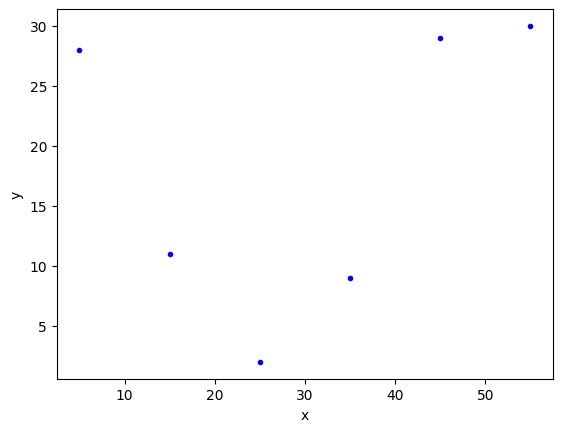

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x, y, "b.")  # círculos azules
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 3. Transformar datos de entrada
Ahora hagamos un polinomio de grado = 3.

Creamos una instancia de esta clase indicando el grado de polinomio que deseamos:

In [ ]:
transformer = PolynomialFeatures(degree=3, include_bias=False)

In [ ]:
transformer.fit(x)

PolynomialFeatures(degree=3, include_bias=False)

Una vez aplicado la función **fit()**, podemos crear una nueva matriz de entrada modificada aplicando la función **transform()**:

In [ ]:
x_ = transformer.transform(x)

In [ ]:
x_

array([[5.00000e+00, 2.50000e+01, 1.25000e+02],
       [1.50000e+01, 2.25000e+02, 3.37500e+03],
       [2.50000e+01, 6.25000e+02, 1.56250e+04],
       [3.50000e+01, 1.22500e+03, 4.28750e+04],
       [4.50000e+01, 2.02500e+03, 9.11250e+04],
       [5.50000e+01, 3.02500e+03, 1.66375e+05]])

### 3. Crear un modelo y entrenarlo

In [ ]:
model = LinearRegression().fit(x_, y)

El modelo de regresión ahora está creado y entrenado. Está listo para hacwer predicciones. Se debe tener en cuenta que el primer argumento de **fit()** es la matriz de entrada modificada **x_** y no la original **x**.

Podemos calcular los coeficientes w1, w2, w3 y b

In [ ]:
print(f"coefficients: {model.coef_}")

coefficients: [-4.93095238e+00  1.56785714e-01 -1.33333333e-03]


In [ ]:
print(f"intercept: {model.intercept_}")

intercept: 50.25892857143397


### 4. Calcular 𝑅²

In [ ]:
r_sq = model.score(x_, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9221817028698267


Compare este resultado con el conseguido en el Notebook con un polinomio de grado 2.

Ejercicio: Hacer una nueva corrida para obtener un modelo con un polinomio de grado 4
## Underfitting y Overfitting
Una pregunta muy importante que puede surgir al implementar la regresión polinomial está relacionada con la elección del grado óptimo de la función de regresión polinomial.

No hay una regla sencilla para hacer esto, depende del caso. Sin embargo, debe tener en cuenta dos problemas que pueden surgir a raíz de esta elección.

### Underfitting
Esto ucurre cuando un modelo no puede capturar con precisión las dependencias entre los datos, generalmente como consecuencia de su propia simplicidad. A menudo produce un 𝑅² bajo con datos conocidos y mala capacidad de generalización cuando se aplica con datos nuevos.

### Overfitting
Esto ocurre cuando un modelo aprende tanto las dependencias de datos como las fluctuaciones aleatorias. En otras palabras, un modelo aprende demasiado bien los datos existentes. Los modelos complejos, que tienen muchas características o términos, a menudo son propensos a sobreajustarse. Cuando se aplican a datos conocidos, estos modelos suelen arrojar un 𝑅² alto. Sin embargo, a menudo no generalizan bien y tienen 𝑅² significativamente más bajo cuando se usan con datos nuevos.

La siguiente figura ilustra los modelos ajustados insuficientemente, bien ajustados y sobreajustados:

![poly-reg.webp](attachment:poly-reg.webp)

* La gráfica superior izquierda muestra una línea de regresión lineal que tiene un 𝑅² bajo. También podría ser importante que una línea recta no pueda tener en cuenta el hecho de que la respuesta real aumente a medida que 𝑥 se aleja de veinticinco y se acerca a cero. Este es probablemente un ejemplo de desajuste.

* La gráfica superior derecha ilustra la regresión polinomial con el grado igual a dos. En este caso, este podría ser el grado óptimo para modelar estos datos. El modelo tiene un valor de 𝑅² que es satisfactorio en muchos casos y muestra bien las tendencias.

* El gráfico inferior izquierdo presenta una regresión polinomial con el grado igual a tres. El valor de 𝑅² es mayor que en los casos anteriores. Este modelo se comporta mejor con datos conocidos que los anteriores. Sin embargo, **muestra algunos signos de sobreajuste, especialmente para los valores de entrada cercanos a sesenta, donde la línea comienza a disminuir, aunque los datos reales no muestran eso**.

* Finalmente, en el gráfico de abajo a la derecha, puedes ver el ajuste perfecto: seis puntos y la recta polinomial de grado cinco (o mayor) dan 𝑅² = 1. Cada respuesta real es igual a su predicción correspondiente.

En algunas situaciones, esto podría ser exactamente lo que está buscando. En muchos casos, sin embargo, se trata de un modelo sobreajustado. **Es probable que tenga un comportamiento deficiente con datos no vistos, especialmente con entradas superiores a cincuenta. Por ejemplo, asume, sin ninguna evidencia, que hay una caída significativa en las respuestas para 𝑥 mayor que cincuenta y que 𝑦 llega a cero para 𝑥 cerca de sesenta**. Tal comportamiento es la consecuencia de un esfuerzo excesivo para aprender y ajustar los datos existentes.

Ver ejemplo publicado en https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386                        
Datasets del ejemplo: **position_salaries.csv**